# Optimisation introduction
Crash course introduction to the field of optimisation and related fields.

# Background
A few colleagues were interested in furhter knowledge of optimisation (objective functions, constraints, etc.)  
and metaheurstics such as genetic algorithms.

# Outline
Use basic intro and some theory  
Some examples/tutorials in python/R  

- The analytics landscape
    - Desciptive - Predictive - Prescriptive
- Linear and non-linear formulations of single-objective optimisation problems 
  - Mathematical programming techniques (linear programming, etc.) to solve them 
- Explosion of combinatorial optimisation
- Metaheuristics
  - Genetic algorithm
- Multi-objective optimisation

# The analytis landscape

<center>
    <img src="img/analytics_landscape.gif" width=1000 height=1000/>
<center>
    
\[[Mathworks](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/company/events/conferences/matlab-computational-finance-conference-nyc/2015/proceedings/predictive-modeling-techniques-insurance.pdf)]

<center>
    <img src="img/analytics_landscape_2.jpeg" width=1000 height=1000/>
<center>


\[[competitive-advantage-with-optimization](https://www.slideshare.net/AnwarAliMohamed/competitive-advantage-with-optimization-mii), 
[Business Analytics and Performance Management](https://pure.au.dk/portal/files/113728189/Working_paper_BA_and_Man_Acc_Final_2017.pdf)]

<center>
    <img src="img/analytics_maturity.png" alt="drawing" width=1000 height=1000/>
<center>


### Machine learning and optimisation
\[[IBM: Machine Learning As Prescriptive Analytics](https://www.ibm.com/developerworks/community/blogs/jfp/entry/Machine_Learning_As_Prescriptive_Analytics?lang=en)]

> One thing we did in the past was to use CPLEX quadratic solver to compute support vector machines.  When we did it we blew away all approaches coming from machine learning as CPLEX was several orders of magnitude faster.  It supports the claim by John Mount that lots of machine learning work does not leverage state of the art optimization techniques.  I'd be interested in revisiting the SVM topic now, given both sides (optimization and machine learning) have made significant progress, and given problem sizes have increased significantly.  
\[[IBM: Machine Learning and Optimization](https://www.ibm.com/developerworks/community/blogs/jfp/entry/machine_learning_and_optimization1?lang=en)]


### Linear programming

A linear programming problem (LP) is an optimization problem for which we do the following:  
1. We attempt to maximize (or minimize) a linear function of the decision variables. The function that is to be maximized or minimized is called the objective function.
2. The values of the decision variables must satisfy a set of constraints. Each constraint must be a linear equation or linear inequality. 
3. A sign restriction is associated with each variable. For any variable xi, the sign restriction  specifies that xi must be either nonnegative (xi 0) or unrestricted in sign (urs). 

\[[Operations research textbook by Winston, pg. 53](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)]

Maximize  
<span style="color:red">  $f(x) = 5x_1 + 3x_2$ </span>   
Subject to  
<span style="color:green"> $2x_1+ x_2 ≤ 40$ </span>  
<span style="color:blue">  $x_1 + 2x_2 ≤ 50$ </span>  
$x_1, x_2 ≥ 0$   

\[[Deterministic Modeling:Linear Optimization with Applications](http://home.ubalt.edu/ntsbarsh/opre640a/partVIII.htm)]

<center>
    <img src="img/carpenter.gif" alt="drawing" width=600 height=600/>
<center>

<center>
    <img src="img/good-will-hunting-oral-history-2.jpg" alt="drawing" width=1000 height=1000/>
<center>

<center>
    <img src="img/dantzig.jpeg" alt="drawing" width=500 height=500/>
<center>

\[[Dantzig real Will Hunting](https://bigthink.com/culture-religion/george-dantzig-real-will-hunting)]

It happened because during my first year at Berkeley I arrived late one
 day at one of Neyman's classes. On the blackboard there were two problems that I
 assumed had been assigned for homework. I copied them down. A few days later I
 apologized to Neyman for taking so long to do the homework?the problems
 seemed to be a little harder to do than usual. I asked him if he still wanted it. He
 told me to throw it on his desk. I did so reluctantly because his desk was covered
 with such a heap of papers that I feared my homework would be lost there forever.
 About six weeks later, one Sunday morning about eight o'clock, Anne and I were
 awakened by someone banging on our front door. It was Neyman. He rushed in
 with papers in hand, all excited: "I've just written an introduction to one of your
 papers. Read it so I can send it out right away for publication." For a minute I had
 no idea what he was talking about. To make a long story short, the problems on the
 blackboard that I had solved thinking they were homework were in fact two famous
 unsolved problems in statistics. That was the first inkling I had that there was
 anything special about them.
 
 \[[Dantzig Interview](http://www.pucrs.br/ciencias/viali/graduacao/po_2/material/textos/2686279.pdf)]

In [59]:
# Maximize f(x) = 5x1 + 3x2
# Subject to:
# 2x1+ x2 ≤ 40
# x1 + 2x2 ≤ 50
# x1, x2 ≥ 0 
from pulp import  *
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Product maximization", LpMaximize)
# Create problem variables
x1=LpVariable("x_1",lowBound = 0)
x2=LpVariable("x_2",lowBound = 0)
# The objective function is added to 'prob' first
prob += 5*x1 + 3*x2, "Profit to be maximized"
# The two constraints are entered
prob += 2*x1 + 1*x2 <= 40, "Constraint 1"
prob += x1 + 2*x2 <= 50, "Constraint 2"
# The problem data is written to an .lp file
prob.writeLP("Productmax.lp")
# The problem is solved using PuLP's choice of Solver
print(prob.solve())
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
# The optimised objective function value is printed to the screen
print("Objective funtion", value(prob.objective))

1
Status: Optimal
x_1 = 10.0
x_2 = 20.0
Objective funtion 110.0


### Transportation problem

Truckloads of beer are to be shipped from two plants to five customers during a particular period of time. Both the available supply at each plant and the required demand by each customer (measured in terms of truckloads) are known. The cost associated with moving one truck load from a plant to a customer is also provided. The objective is to make a least-cost plan for moving the beer such that the demand is met and shipments do not exceed the available supply from each brewery.
The following table provides the data for the problem described in the previous Data overview paragraph.

\[[AIMMS: Tutorial_beginner](https://download.aimms.com/aimms/download/references/AIMMS_tutorial_beginner.pdf)]

<center>
    <img src="img/aimms_tutorial_beer.png" alt="drawing" width=1000 height=1000/>
<center>

<center>
    <img src="img/aimms_beginners_beer_formulation.png" alt="drawing" width=1000 height=1000/>
<center>

_Unit Transport Cost ($ U_{pc} $)_

|           | Amsterdam | Breda | Gouda | Amersfoort | Den Bosch |   | Supply |
|-----------|-----------|-------|-------|------------|-----------|---|--------|
| Haarlem   | _131_     | _405_   | _188_   | _396_        | _485_       |   | 47     |
| Eindhoven | _554_       | _351_   | _479_   | _366_        | _155_       |   | 63    |
|           |           |       |       |            |           |   |        |
| Demand    | 28       | 16    | 22    | 41         | 12       |   |        |

In [56]:
### Beer example
### https://www.coin-or.org/PuLP/CaseStudies/a_transportation_problem.html
### adapted for https://download.aimms.com/aimms/download/references/AIMMS_tutorial_beginner.pdf
from pulp import *
# Creates a list of all the supply nodes
Warehouses = ["A","B"]
# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 47,
        "B": 63}
# Creates a list of all demand nodes
Bars = ["1", "2", "3", "4", "5"]
# Creates a dictionary for the number of units of demand for each demand node
demand = {"1": 28,
        "2": 16,
        "3": 22,
        "4": 31,
        "5": 12}
# Creates a list of costs of each transportation path
# https://stackoverflow.com/questions/7728313/python-pulp-using-with-matrices
costs = { "A" : {"1" : 131, "2" : 405, "3" : 188, "4" : 396, "5" : 485},
          "B" : {"1" : 554, "2" : 351, "3" : 479, "4" : 366, "5" : 155 }}
# Creates the prob variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
# A dictionary called route_vars is created to contain the referenced variables (the routes)
route_vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
# The objective function is added to prob first
prob += lpSum([route_vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum of Transporting Costs"
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([route_vars[w][b] for b in Bars]) <= supply[w], "Sum of Products out of Warehouse %s"%w
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([route_vars[w][b] for w in Warehouses]) >= demand[b], "Sum of Products into Bars %s"%b
prob.writeLP("Beer_problem.lp")

In [57]:
# The problem is solved using PuLP's choice of Solver
print(prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
# The optimised objective function value is printed to the screen
print("Objective funtion", value(prob.objective))

1
Status: Optimal
Route_A_1 = 28.0
Route_A_2 = 0.0
Route_A_3 = 19.0
Route_A_4 = 0.0
Route_A_5 = 0.0
Route_B_1 = 0.0
Route_B_2 = 16.0
Route_B_3 = 3.0
Route_B_4 = 31.0
Route_B_5 = 12.0
Objective funtion 27499.0


In [37]:
### Using R 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

#script adapted from 
#http://www.r-bloggers.com/linear-programming-in-r-an-lpsolveapi-example/

#Clear all data from memory
rm(list=ls(all=TRUE))

#set working directory,
# setwd("Dropbox/Solvers_Tutorial/OR_345_Solver_Tutorial_2016")

#run installed package
library(lpSolveAPI)

#if you have not installed the package yet (do so): 
#install.packages("lpSolveAPI")

#define the datasets (if you want (especially with large datasets) can rather read in values via "read.csv" command )

UnitTransport<-data.frame(variables=c('Haa_Ams','Haa_Bre','Haa_Gou', 'Haa_Ame', 'Haa-Den', 'Ein_Ams', 'Ein_Bre', 'Ein_Gou', 'Ein_Ame', 'Ein_Den'), UnitTransportCost=c(131,405,188, 396, 485, 554, 351, 479, 366, 155))

SupplyConstraint<-data.frame(Plants=c('Haa','Ein'), MaxSupply=c(47,63))
DemandConstraint<-data.frame(Customers=c('Ams','Breda', 'Gouda', 'Amersfoot', 'Den'), Demand=c(28,16, 22, 31, 12))

#create an LP model with 7 constraints and 10 decision variables

lpmodel<-make.lp(NROW(SupplyConstraint)+NROW(DemandConstraint),nrow(UnitTransport))
#check lpmodel (wrties .lp file in workind directory)
lpmodel

###create Supply constraints (rows 1-2)
# create coefficients per decision variables
set.row(lpmodel, 1, rep(1,5), 1:5)
set.row(lpmodel, 2, rep(1,5), 1:5)
#automatically <=0
set.constr.value(lpmodel, rhs=SupplyConstraint$MaxSupply, constraints=1:2)

#create Demand constraints (rows 3-7) (now using for loop for ease)
for (i in 1:nrow(DemandConstraint)){
set.row(lpmodel, 2+i, rep(1,2), c(i,i+5)) #offset of 5 (e.g. 1st and 6th decision variable in UnitTransport)
}
set.constr.value(lpmodel, rhs=DemandConstraint$Demand, constraints=3:7)
#automatically <=0, change to >=0
set.constr.type(lpmodel, rep(">=", nrow(DemandConstraint)), constraints=3:7)

#set decision varaibles to integer 
#set.type(lpmodel, 1:10,"integer")

#set objective coefficients
set.objfn(lpmodel, UnitTransport$UnitTransportCost)

#set objective direction
lp.control(lpmodel,sense='min')

#I in order to be able to visually check the model, I find it useful to write the model to a text file
write.lp(lpmodel,'model.lp',type='lp')

#solve the model, if this return 0 an optimal solution is found
solve(lpmodel)

#return the proposed solution
get.objective(lpmodel)

#return the proposed varaibles
get.variables(lpmodel)

## Integer programming

<center>
    <img src="img/integer_programming_winston.png" alt="drawing" width=1000 height=1000/>
<center>

\[[Operations research textbook by Winston](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)]

<center>
    <img src="img/integer_programming_winston_1.png" alt="drawing" width=1000 height=1000/>
<center>

\[[Operations research textbook by Winston](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)]

<center>
    <img src="img/integer_programming_winston_2.png" alt="drawing" width=1000 height=1000/>
<center>

\[[Operations research textbook by Winston](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)]

<center>
    <img src="img/integer_programming_winston_3.png" alt="drawing" width=1000 height=1000/>
<center>

\[[Operations research textbook by Winston](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)]

The algorithm explores feasible branches of this tree, representing various disjoint subsets of the
solution set. Before enumerating the candidate solutions of a branch, the quality of solutions
of a branch is compared to upper and lower bounds on an optimal solution, and if it cannot
produce a better solution than the best one found so far by the algorithm, the entire branch of
the search tree is discarded. This method of pruning the search tree enables the algorithm not
to enumerate all the possible branches (basically avoiding a brute-force enumeration), thereby
eliminating the time and resources required to evaluate candidate solutions that will certainly
not contain optimal solutions.
For IP problems, the B&B method is initiated by solving the LP relaxation of the IP (i.e.
allowing the decision variables to be non-integer values), typically via the simplex algorithm. If
all the decision variables solved via the simplex algorithm assume integer values, then the optimal
solution to the LP relaxation is also an optimal solution to the IP problem Winston2004 If,
however, some of the decision variables are not integer, then those variables are branched upon
by creating smaller subproblems in an attempt to nd optimal integer values for these decision
variables. For MIP problems, only the variables that are required to be integers are branched
upon Winston2004 | the other continuous decision variables are treated conventionally in the
simplex algorithm.


## Knapsack problem

<center>
<img src="img/knapsack.png"  width="500" height="500"/>
<center>

- Combinatorial optimisation problem
- Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. 
- It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items.

[Wikipedia](https://en.wikipedia.org/wiki/Knapsack_problem)

In [39]:
# https://towardsdatascience.com/integer-programming-in-python-1cbdfa240df2
import cvxpy
import numpy as np

# The data for the Knapsack problem
tot_weight = 165 # "Capacity" of sack
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
utilities = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])

# The boolean variables we are solving for
selection = cvxpy.Bool(len(weights))
#selection = cvxpy.Variable(len(utilities), boolean=True)

# The sum of the weights should be less than or equal to P
weight_constraint = weights * selection <= tot_weight

# Our total utility is the sum of the item utilities
total_utility = utilities * selection

# We tell cvxpy that we want to maximize total utility 
# subject to weight_constraint. All constraints in 
# cvxpy must be passed as a list
knapsack_problem = cvxpy.Problem(cvxpy.Maximize(total_utility), [weight_constraint])

# Solving the problem (choosing the GLPK Mixed Integer solver)
print("Optimal (max) total_utility")
print(knapsack_problem.solve(solver=cvxpy.GLPK_MI))

print("Optimal selections")
print(selection.value.T)

Optimal (max) total_utility
309.0
Optimal selections
[[1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]]


# Combinatorial exposion

## Travelling Salesman problem

<center>
    <img src="img/tsp.svg" width=1000 height=1000/>
<center>

<center>
    <img src="img/tsp_map.png" width=1000 height=1000/>
<center>
    
\[[Google OR routing](https://developers.google.com/optimization/routing/tsp)]

There’s no simple mathematical formula to find the most efficient route for our salesman. Instead, the only way to solve the problem is to calculate the length of each route and see which one is the shortest.

What’s worse, performing this calculation gets exponentially harder the more cities are added to the route. With four cities, there are only three different routes to consider. But with six cities, there are 360 different routes that need to be calculated. If you’ve got a route with ten or more cities the number of possible routes is in the millions.
This makes the traveling salesman problem one of a broad class of problems computer scientists call ‘NP hard.’ These are problems that get exponentially difficult very quickly, which also includes problems related to hacking encrypted systems and cryptocurrency mining. For pretty obvious reasons, a lot of people are interested in finding ways to solve these problems as quickly as possible.


The number of possible paths to consider is given by (N-1)!/2. The exhaustive search for the shortest tour becomes very quickly impossible to conduct.  
Why? Because, assuming that your computer can evaluate the length of a billion tours per second, calculations would last 40 years in the case of twenty cities and would jump to 800 years if you added one city to the tour [1]. These numbers give meaning to the expression "combinatorial explosion". Consequently, we must settle for an approximate solutions, provided we can compute them efficiently

\[[maplesoft TSP](https://www.maplesoft.com/applications/view.aspx?SID=6873)]


This leads us to the big question: are there any polynomial-time algorithms for problems in the NP class that simply haven't been discovered yet?  
The question is known as the P versus NP problem because the class of problems that can be solved in polynomial time is called P.   
P versus NP is one of the hardest open problems in maths. Anyone who manages to answer it will win $1 million from the Clay Mathematics Institute (see [How maths can make you rich and famous](https://plus.maths.org/content/how-maths-can-make-you-rich-and-famous#np)).   
Not everyone agrees, but most mathematicians seem to think that P is not equal to NP: this would mean that NP problems really are very difficult, they cannot be solved in polynomial time.

\[[plus maths TSP](https://plus.maths.org/content/travelling-salesman)]

The P versus NP problem is a major unsolved problem in computer science. It asks whether every problem whose solution can be quickly verified (technically, verified in polynomial time) can also be solved quickly (again, in polynomial time).
It is one of the seven Millennium Prize Problems selected by the Clay Mathematics Institute, each of which carries a US$1,000,000 prize for the first correct solution.


## God's number

<center>
<img src="img/runiks_cube.png"  width="200" height="200"/>
<center>

Mathematicians love the Rubik’s Cube. There’s no denying it. They are amazed at how such a seemingly simply puzzle can hold so many secrets. There is always something new to learn about the cube (if you are willing to learn, of course). Perhaps the biggest secret of all, one that took over 30 years for mathematicians to crack is God’s Number.

God’s Number, as many cube enthusiasts will already know, is the maximum number of moves required to solve any of the 43,252,003,274,489,856,000 combinations of the cube. It has been proven that this number is 20 (cube20.org), however the discovery is fairly recent (July 2010). The term “God’s Number” was coined because the mind of a being able to find the shortest sequence of moves to solve any scramble sequence would have to be thousands of times more powerful than our own, able to test millions of different combinations in the blink of an eye, something that mathematicians believe only a Deity could possess.

This number may seem low, but theoretically it should be even lower. Only around 490,000,000 combinations require the full 20 moves to be solved. Although 490 million is a huge number, it is only a fraction of the 43 quintillion possible combinations (0.0000011328955% to be precise). The chances of generating a random scramble that can only be solved in 20 moves, no more no less, is around 1 in a billion. However, the number of combinations that can be solved in 19 moves is approximately 1.5 quintillion. This means that God’s Number is much closer to 19 than 20, but unfortunately even if only 1 scramble sequence was impossible to solve in less than 20 moves, God’s Number would still be 20.

# Metaheuristics

In computer science and mathematical optimization, a metaheuristic is a higher-level procedure or heuristic designed to find, generate, or select a heuristic (partial search algorithm) that may provide a sufficiently good solution to an optimization problem, especially with incomplete or imperfect information or limited computation capacity.

\[[Wikipedia](https://en.wikipedia.org/wiki/Metaheuristic)]

### Genetic algorithm

<center>
<img src="img/genetic_algorithm.png"  width="500" height="500"/>
<center>
    
\[[GA_intro](https://www.analyticsvidhya.com/blog/2017/07/introduction-to-genetic-algorithm/)]

<center>
<img src="img/ga_steps.png"  width="500" height="500"/>
<center>

Solve:  
_min_ $f(x) = x^2$  
With genetic algorithm

<center>
<img src="img/genetic_algorithm_table_exaple.png"  width="500" height="500"/>
<center>
    
\[[GA_Lecture](https://www.massey.ac.nz/~nhreyes/MASSEY/159741/Lectures/Lecture%20-%20Genetic%20Algorithm%20-%20Part%201.pdf)]

/anaconda3/lib/python3.6/site-packages/deap/creator.py:180: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/deap/creator.py:180: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Solve time is 0.003292083740234375


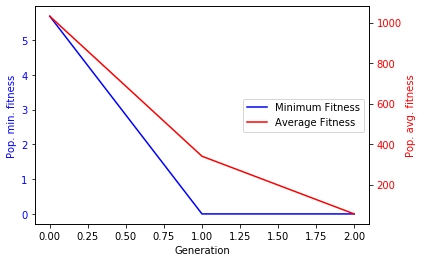

In [14]:
%matplotlib inline
import time
import random

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import benchmarks
import numpy

number_of_variables=1
x_min= -50
x_max = 50
pop_size=20
generations=2


start_time=time.time()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual",  list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generator
toolbox.register("attr_float", random.uniform, a=x_min, b=x_max)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, number_of_variables)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def objectiveFunction(individual):
    return individual[0]**2,

y_min= objectiveFunction([x_min])[0]
y_max= objectiveFunction([x_max])[0]

# Operator registering
toolbox.register("evaluate", objectiveFunction)
toolbox.register("mate", tools.cxUniform, indpb=0.05)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    random.seed(64)
    
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_fit.register("avg", numpy.mean)
    stats_fit.register("std", numpy.std)
    stats_fit.register("min", numpy.min)
    stats_fit.register("max", numpy.max)
    stats_fit.register("all", list)
    
    stats_ind = tools.Statistics(lambda ind: ind)
    stats_ind.register("all", list)
    
    mstats = tools.MultiStatistics(fitness=stats_fit, ind=stats_ind)

    pop, logbook = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=0.5, 
        mutpb=0.2, 
        ngen=generations,
        stats=mstats, 
        halloffame=hof,
        verbose=False
    )

end_time = time.time()
solve_time = end_time - start_time
#print(pop[1])
print("Solve time is {}".format(solve_time))

### Draw graph
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["fitness"].select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Pop. min. fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
ax2.set_ylabel("Pop. avg. fitness", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

### Show final population
#pop

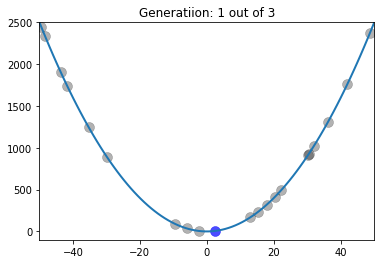

In [15]:
### Show animation
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
# from math import sin, cos, pi, exp, e, sqrt

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

# https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
scats = []

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( x_min, x_max))
ax.set_ylim(( -100, y_max))
x = np.linspace(-50, 50, 100)
y = x**2

line, = ax.plot([], [], lw=2)
line.set_data(x, y)


def animate(i):
    
    ax.set_title("Generatiion: {} out of {}".format(i+1, len(fit_mins)))

    # https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
    global scats
        # first remove all old scatters
    for scat in scats:
        scat.remove()
    scats=[]

    x_all = logbook.chapters['ind'].select('all')[i]
    y_all = logbook.chapters['fitness'].select('all')[i]
    
    y=fit_mins[i]
    x=sqrt(y)
    
    scats.append(ax.scatter(x, y, lw=0.5, s=100, color='blue', alpha=0.7))
    scats.append(ax.scatter(x_all, y_all, lw=0.5, s=100, color='black', alpha=0.3))


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(fit_mins), interval=1000)

HTML(ani.to_jshtml())

Hard problems

[DEAP benchmark optimisation problems](https://deap.readthedocs.io/en/master/api/benchmarks.html)

In [18]:
number_of_variables=1
x_min= -5
x_max = 5
pop_size= 50
generations= 10


start_time=time.time()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual",  list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generator
toolbox.register("attr_float", random.uniform, a=x_min, b=x_max)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, number_of_variables)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

y_min= objectiveFunction([x_min])[0]
y_max= objectiveFunction([x_max])[0]


# Operator registering
toolbox.register("evaluate", benchmarks.rastrigin)
toolbox.register("mate", tools.cxUniform, indpb=0.05)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    random.seed(64)
    
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_fit.register("avg", numpy.mean)
    stats_fit.register("std", numpy.std)
    stats_fit.register("min", numpy.min)
    stats_fit.register("max", numpy.max)
    stats_fit.register("all", list)
    
    stats_ind = tools.Statistics(lambda ind: ind)
    stats_ind.register("all", list)
    
    mstats = tools.MultiStatistics(fitness=stats_fit, ind=stats_ind)

    pop, logbook = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=0.5, 
        mutpb=0.2, 
        ngen=generations,
        stats=mstats, 
        halloffame=hof,
        verbose=False
    )

end_time = time.time()
solve_time = end_time - start_time
#print(pop[1])
print("Solve time is {}".format(solve_time))

Solve time is 0.03159022331237793


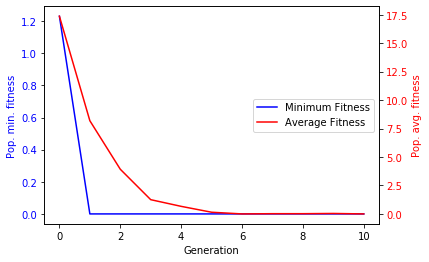

In [19]:
### Draw graph
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["fitness"].select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Pop. min. fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
ax2.set_ylabel("Pop. avg. fitness", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

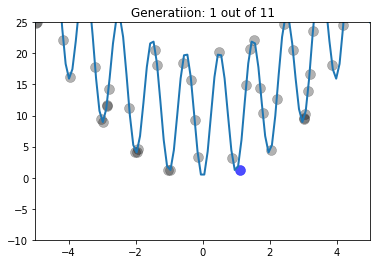

In [20]:
# https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
scats = []

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( x_min, x_max))
ax.set_ylim(( -10, y_max))
x = np.linspace(x_min, x_max, 100)
y = np.asarray([benchmarks.rastrigin([elem]) for elem in x])

line, = ax.plot([], [], lw=2)
line.set_data(x, y)

def animate(i):
    
    ax.set_title("Generatiion: {} out of {}".format(i+1, len(fit_mins)))

    # https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
    global scats
        # first remove all old scatters
    for scat in scats:
        scat.remove()
    scats=[]

    x_all = logbook.chapters['ind'].select('all')[i]
    y_all = logbook.chapters['fitness'].select('all')[i]
    
    y=fit_mins[i]
    x=sqrt(y)
    
    scats.append(ax.scatter(x_all, y_all, lw=0.5, s=100, color='black', alpha=0.3))
    scats.append(ax.scatter(x, y, lw=0.5, s=100, color='blue', alpha=0.7))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(fit_mins), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())

## Genetic algorithms applications

https://en.wikipedia.org/wiki/List_of_genetic_algorithm_applications  
https://www.popularmechanics.com/science/math/a25686417/amoeba-math/  

## Other metaheuristics

There are two kinds of meta-heuristics:  
a. population or  
b. path  
Most algorithms do not have a specific population, so it is possible to use the algorithm for a path or a population.

\[[SMART GRID](https://smart--grid.net/cours-lessons-theory/combinatorial-optimization/)]

<center>
<img src="img/metaheuristic_parcours-population.png"  width="500" height="500"/>
<center> 

Bit out of hand  
https://github.com/fcampelo/EC-Bestiary  
http://oneweirdkerneltrick.com/spectral.pdf

# Multi-objective optimisation

<center>
$f_1(x)=x_1$  ;   $f_2(x)=1+x_2^2-x_1-a\sin(b\pi x_1)$  
<center>
<center>
min $F(x)=\omega_1 f_1(x) + \omega_2f_2(x)$ 
<center>

Convex ($a=0.2$ ; $b=1$)  

<center>
<img src="img/convex_moo.gif"  width="500" height="500"/>
<center>
    
\[[wikimedia](https://commons.wikimedia.org/wiki/File:Convex_outcome_set_of_a_multi-objective_optimization_problem.gif)]

Non-convex  ($a=0.1$ ; $b=3$)  

<center>
<img src="img/nonconvex_moo.gif"  width="500" height="500"/>
<center>
    
\[[wikimedia](https://commons.wikimedia.org/wiki/File:NonConvex.gif)]

<center>
<img src="img/front_pareto.png"  width="500" height="500"/>
<center>

### Optimisation techniques

<center>
    <img src="img/optimisation_techniques.png" width=1000 height=1000/>
<center>
    
\[[SMART GRID](https://smart--grid.net/cours-lessons-theory/combinatorial-optimization/)]

<center>
    <img src="img/optimisation_techniques_2.png" width=1000 height=1000/>
<center>

<center>
    <img src="img/optimisation_techniques_3.png" width=1000 height=1000/>
<center>

In computer science and operations research, exact algorithms are algorithms that always solve an optimization problem to optimality.  
\[[Wikipedia: Exact_algorithm](https://en.wikipedia.org/wiki/Exact_algorithm)